In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("data/ownedgames.json", "r") as f :
    data = json.loads(f.read())

#### Removing empty steamids

In [3]:
data = {key : value for key, value in data.items() if value != {}}

#### Removing zero game_count steamids

In [4]:
data = {key : value for key, value in data.items() if value["game_count"] != 0}

#### Making a DataFrame

In [5]:
dat = []
for key, value in data.items() :
    steamid = key
    for item in value["games"] :
        dat.append((int(steamid), item["appid"], item["playtime_forever"]))

In [6]:
df = pd.DataFrame(dat, columns = ["steamid", "appid", "playtime_forever"])

In [7]:
df.head()

,steamid,appid,playtime_forever
0,76561197969918174,10,3
1,76561197969918174,20,0
2,76561197969918174,30,0
3,76561197969918174,40,0
4,76561197969918174,50,0


In [8]:
density = lambda df : len(df) / (df["steamid"].nunique() * df["appid"].nunique())

In [10]:
print("Unique SteamIds :", df["steamid"].nunique())
print("Unique AppIds :", df["appid"].nunique())
#print("Density : {0:.3f} %".format(density * 100))

Unique SteamIds : 16732
Unique AppIds : 26203


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
groupedByAppid = df.groupby(by = "appid")["steamid"].count()
#groupedBySteamid = df.groupby(by = "steamid").count()["appid"]
#filteredsteams = groupedBySteamid[groupedBySteamid > 20]

In [13]:
groupedByAppid[groupedByAppid <= 5].count()

6321

In [14]:
elbow_apps = groupedByAppid.groupby(groupedByAppid).count()
x, y = elbow_apps.index, elbow_apps.values

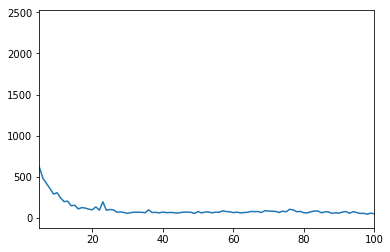

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim([5,100])
plt.show()

Choosing elbow point as 10 from above graph to filter

In [16]:
filteredapps = groupedByAppid[groupedByAppid > 10]

In [17]:
filter_app_df = pd.merge(filteredapps.reset_index(), df, on = "appid").drop("steamid_x", axis = 1).rename(index = str, columns = {"steamid_y" : "steamid"})

In [18]:
density(filter_app_df)

0.021095196544402263

In [19]:
filter_app_df.head()

,appid,steamid,playtime_forever
0,10,76561197969918174,3
1,10,76561198001033415,582
2,10,76561197987090062,0
3,10,76561197960794555,251
4,10,76561198053398526,211


In [25]:
filter_app_df["appid"].nunique()

18026

In [26]:
filter_app_df["steamid"].nunique()

16732

In [47]:
groupedBySteamid = filter_app_df.groupby(by = "steamid").count()["appid"]
groupedBySteamid

steamid
76561197960269425     461
76561197960270862     478
76561197960275345    7237
76561197960290105     386
76561197960298223      61
76561197960316968     706
76561197960321194      91
76561197960321469     647
76561197960324042     383
76561197960332616    4858
76561197960336615    1094
76561197960344645     522
76561197960347707     652
76561197960355570    2574
76561197960374013     209
76561197960383354     394
76561197960383680    2580
76561197960396540     485
76561197960400933     150
76561197960404227     153
76561197960404437     351
76561197960406342     265
76561197960408363    1524
76561197960414320     663
76561197960421782     218
76561197960429818    3437
76561197960434859     132
76561197960437308     352
76561197960442947    1599
76561197960447288     721
                     ... 
76561198848311506       8
76561198848844242       4
76561198848944030      18
76561198849056013      29
76561198849060976       8
76561198849468202       3
76561198849668274       4
7656

In [48]:
groupedBySteamidNparr = np.array(groupedBySteamid)
groupedBySteamidNparr

array([ 461,  478, 7237, ...,   11,    8,    4])

/home/ieshan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


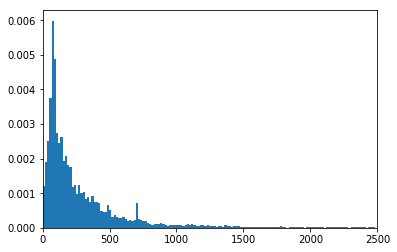

In [56]:
plt.hist(groupedBySteamidNparr, normed=True, bins=1000)
plt.xlim([0,2500])
plt.show()

/home/ieshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


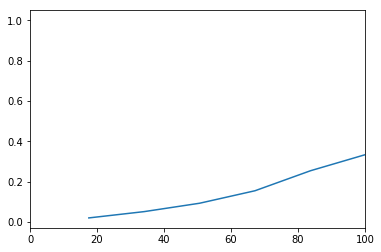

In [76]:
counts, bin_edges = np.histogram(groupedBySteamidNparr, bins = 1000, normed=True)
ecdf = np.cumsum(counts)
plt.plot(bin_edges[1:], ecdf/ecdf[-1])
plt.xlim([0, 100])
plt.show()

#we are cutting the graph at 65
#reason: elbow of cdf occurs at 65 -> elbow of pdf occurs at 65 -> distribution of number of app ids start to increase rapidly after 65
# -> users with number of app ids below 65 are rare.  

Having filtered out all the apps which have less than 10 players, we will now filter steamids which have less then x apps where we will determine x again by elbow method.

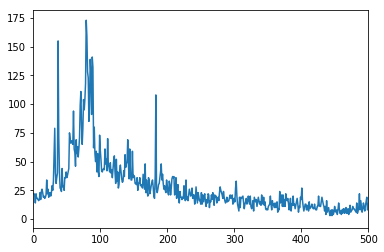

In [63]:
fig, ax = plt.subplots()
ax.plot(x1, y1)
ax.set_xlim([0,500])
plt.show()

/home/ieshan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


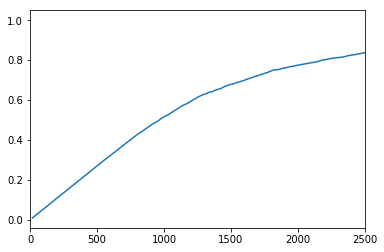

In [61]:
counts, bin_edges = np.histogram(x1, bins= 1000, normed=True)
ecdf = np.cumsum(counts)
plt.plot(bin_edges[1:], ecdf/ecdf[-1])
plt.xlim([0, 2500])
plt.show()

In [77]:
filteredsteams = groupedBySteamid[groupedBySteamid > 65]

In [78]:
filter_steam_df = pd.merge(filteredsteams.reset_index(), filter_app_df, on = "steamid").drop("appid_x", axis = 1).rename(index = str, columns = {"appid_y" : "appid"})

In [79]:
density(filter_steam_df)

0.02436439402085409

In [80]:
filter_steam_df[filter_steam_df["playtime_forever"] == 0]["steamid"].nunique()

14259

In [83]:
filter_steam_df.to_csv("filtered_data.csv")

In [226]:
len(filter_steam_df)

6006754

In [81]:
filter_steam_df["appid"].nunique()

18026

In [82]:
filter_steam_df["steamid"].nunique()

14260

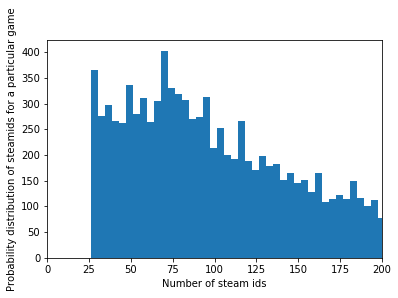

In [137]:
fig, ax = plt.subplots()
ax.hist(filteredapps, bins = 3000)
ax.set_xlabel("Number of steam ids")
ax.set_ylabel("Probability distribution of steamids for a particular game")
ax.set_xlim([0, 200])
plt.show()

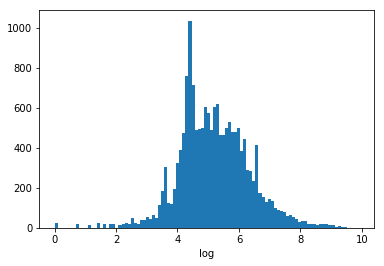

In [96]:
fig, ax = plt.subplots()
ax.hist(np.log(aids), bins = 100)
ax.set_xlabel("log")
plt.show()

In [87]:
np.exp(3)

20.085536923187668